In [1]:
import numpy as np
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Conv1D, MaxPooling1D
from keras.models import load_model
import os #システム操作系
from pathlib import Path #ファイル操作系
import tensorflow as tf
import time
import datetime
import csv
import sys
sys.path.append(os.pardir)
from createdatas import createdata
from createdatas2 import createdata1
from scipy.optimize import curve_fit    # フィッティング用
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE' #意味はわからん

date = str(datetime.date.today())

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

Using TensorFlow backend.


現在時刻： 2020-11-13 17:41:52.247655


In [2]:
train_num = 10000 #訓練データの数
test_num = 1000 #テストデータの数
data_size = 100 #配列の大きさ
NOISE = 30

x_train = np.zeros((train_num,data_size))
y_train = np.zeros((train_num,data_size))
t_train = np.zeros((train_num, 3))
ty_train = np.zeros((train_num, 3))
x_test = np.zeros((test_num,data_size))
y_test = np.zeros((test_num,data_size))
t_test = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))

print(np.arange(0.0, 2.0, 0.1).repeat(1000/20).shape)

(1000,)


経過時間:27.173256158828735[sec]
平均絶対誤差: 0.117488 ± 0.087827


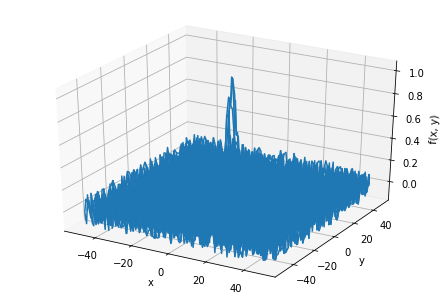

(10000, array([[ 0.03806995,  0.07590746,  0.11255247, ...,  0.09412212,
          0.02345896,  0.04679573],
        [-0.08450705, -0.13566864, -0.11765829, ..., -0.02876796,
          0.01311119,  0.09467307],
        [ 0.1014731 ,  0.05984163, -0.10888681, ...,  0.12120924,
          0.0415105 ,  0.01455485],
        ...,
        [-0.11994841,  0.1349717 ,  0.01859232, ..., -0.03363182,
          0.00186398,  0.0335023 ],
        [-0.1471244 ,  0.10272255,  0.06450402, ..., -0.03164377,
         -0.03422833, -0.13299362],
        [ 0.12668405,  0.11772708, -0.11571362, ..., -0.04060274,
          0.02363675,  0.14680247]]), array([[ 0.03950714, -0.01275237, -0.1164285 , ..., -0.11433915,
          0.12835755, -0.00209028],
        [-0.08460765, -0.02053194,  0.06763135, ...,  0.053706  ,
         -0.01094333,  0.06361967],
        [ 0.07696543, -0.09369151,  0.101961  , ...,  0.09829006,
         -0.03600391,  0.14570905],
        ...,
        [ 0.08833112, -0.12877334,  0.0821737 , 

In [3]:
#訓練データの生成
fit_param_x = np.zeros((train_num, 4))
fit_param_y = np.zeros((train_num, 4))

createdata1(train_num, NOISE, data_size, x_train, y_train, t_train, ty_train, fit_param_x, fit_param_y)

[1. 0. 5.]
[1. 0. 5.]


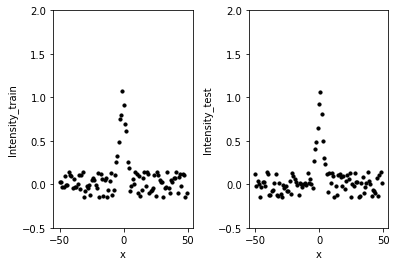

In [5]:
print(t_train[0])
print(t_test[0])
#表示
x_array = np.arange(-50, 50, 1.0)   
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.scatter(x_array, x_train[0],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_train')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.scatter(x_array, x_test[999],  color="black", label = 'x0 = 0.0', s=10)
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_test')
plt.ylim(-0.5, 2.0)
plt.show()
plt.close()

経過時間:23.345383882522583[sec]
平均絶対誤差: 0.115959 ± 0.086611
経過時間:2.3956851959228516[sec]
平均絶対誤差: 0.122973 ± 0.089315


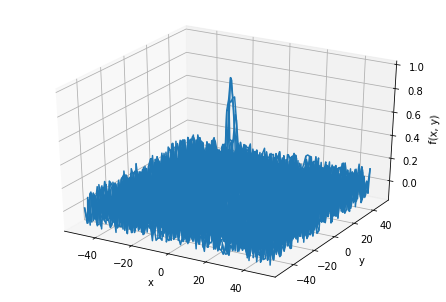

(1000, array([[-0.03105611, -0.135824  ,  0.06874868, ..., -0.100263  ,
          0.14112534,  0.00152844],
        [ 0.05041157,  0.03415361, -0.10069608, ...,  0.00715846,
         -0.11658807, -0.09348485],
        [ 0.14644181,  0.0248659 , -0.02585646, ...,  0.03660331,
          0.07970787,  0.08527802],
        ...,
        [ 0.10202223, -0.11688375,  0.08213621, ..., -0.03738414,
          0.04200548, -0.06377973],
        [ 0.03941133, -0.04341656, -0.04316102, ..., -0.07459948,
          0.09652153, -0.0986058 ],
        [-0.01435443,  0.1111121 , -0.08773732, ..., -0.12035306,
          0.1286728 , -0.01737698]]), array([[ 0.0366015 ,  0.02250372, -0.06441626, ...,  0.13755407,
          0.07372413, -0.07439109],
        [-0.14654491,  0.05954899,  0.02828051, ...,  0.08411002,
         -0.11294812, -0.12008323],
        [-0.05060975,  0.01351691, -0.05364055, ...,  0.03655027,
         -0.14859457, -0.00577824],
        ...,
        [-0.08534651,  0.00462468,  0.02810656, .

In [4]:
#テストデータの生成
fit_param_x = np.zeros((test_num, 4))
fit_param_y = np.zeros((test_num, 4))

createdata(test_num, NOISE, data_size, x_test, y_test, t_test, ty, fit_param_x, fit_param_y)
createdata1(test_num, NOISE, data_size, x_test, y_test, t_test, ty, fit_param_x, fit_param_y)

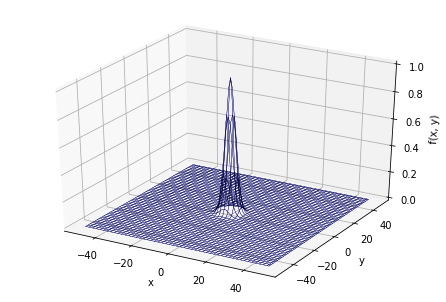

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
x_array = np.arange(-center, center, 1.0)                         # x配列
y_array = np.arange(-center, center, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
intensity1 = i0 * np.exp(-2*((x_grid-x0)**2 + (y_grid-y0)**2)/w0**2).T

nx = len(x_array)
ny = len(y_array)
intensity2 = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
x0 = x0 + center
y0 = y0 + center
for i in range(nx):
    for j in range(ny):
        intensity2[i][j] = i0 * np.exp(-2*((i-x0)*(i-x0) + (j-y0)*(j-y0))/w0/w0)
x0 = x0 - center
y0 = y0 - center

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(x_grid, y_grid, intensity1, color='blue',linewidth=0.3)
ax.plot_wireframe(x_grid, y_grid, intensity2, color='black',linewidth=0.3)
plt.show()


現在時刻： 2020-11-13 17:46:30.342867
保存ファイル名： 2020-11-13_17-46.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-13_17-46.svg


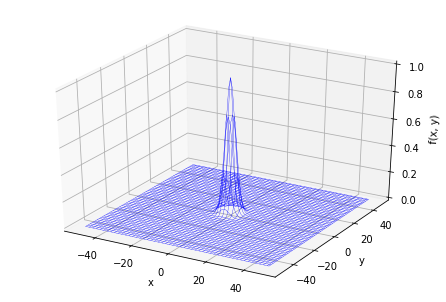

現在時刻： 2020-11-13 17:46:30.754458
保存ファイル名： 2020-11-13_17-46noise.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-13_17-46noise.svg


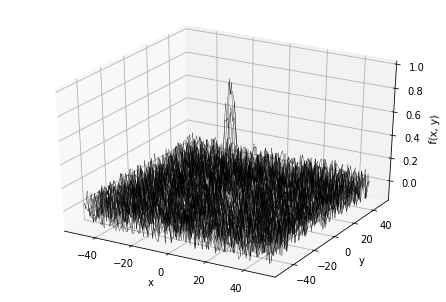

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
x_array = np.arange(-center, center, 1.0)                         # x配列
y_array = np.arange(-center, center, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
intensity = i0 * np.exp(-2*((x_grid-x0)**2 + (y_grid-y0)**2)/w0**2).T

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(x_grid, y_grid, intensity, color='blue',linewidth=0.3)
plt.savefig(save_file)
plt.show()

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'noise.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

nx = len(x_array)
ny = len(y_array)
noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
noise = noise.reshape((nx,ny))
intensity_noise = intensity + noise

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.plot_wireframe(x_grid, y_grid, intensity_noise, color='black',linewidth=0.3)
plt.savefig(save_file)
plt.show()

In [6]:
#訓練データ,テストデータの保存
save_x_train = "/Users/nagaiyuma/Desktop/maindata/"+date+"x_train30%.csv"
save_t_train = "/Users/nagaiyuma/Desktop/maindata/"+date+"t_train30%.csv"
save_x_test = "/Users/nagaiyuma/Desktop/maindata/"+date+"x_test30%.csv"
save_t_test = "/Users/nagaiyuma/Desktop/maindata/"+date+"t_test30%.csv"

with open(save_x_train,'w') as f:
    writer = csv.writer(f)
    writer.writerows(x_train)
with open(save_t_train,'w') as f:
    writer = csv.writer(f)
    writer.writerows(t_train)
with open(save_x_test,'w') as f:
    writer = csv.writer(f)
    writer.writerows(x_test)
with open(save_t_test,'w') as f:
    writer = csv.writer(f)
    writer.writerows(t_test)

In [4]:
#過去の訓練データ読込
data_py_path = "/Users/nagaiyuma/Desktop/maindata/201016/noise30%/2020-10-16"
with open(data_py_path + "x_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_train = np.array([row for row in reader])
    
with open(data_py_path + "x_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    x_test = np.array([row for row in reader])
    
with open(data_py_path + "t_train.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_train = np.array([row for row in reader])
    
with open(data_py_path + "t_test.csv") as f:
    reader = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    t_test = np.array([row for row in reader])

In [5]:
#まともなCNN3の実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
train_x = x_train.reshape(-1, 100, 1)
train_t = t_train
test_x = x_test.reshape(-1, 100, 1)
test_t = t_test

model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(3, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t))

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/parameters/"+date+"-30%cnn3.h5"
model.save(save_model_path)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 50)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 50)            7550      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 10)            1510      
_________________________________________________________________
flatten_1 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)             

In [ ]:
#historyの保存
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

save_data = np.array((epochs, mae, val_mae, loss, val_loss))
#訓練データ,テストデータの保存
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'noise{NOISE}.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

with open(save_name,'w') as f:
    writer = csv.writer(f)
    writer.writerows(x_train)

2020-11-09_cnn3_noise30_N1000.png


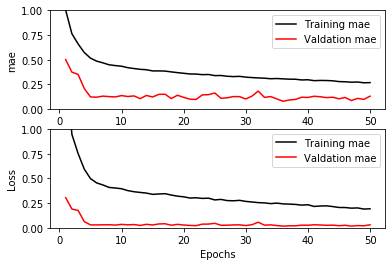

In [6]:
N = 1000
NOISE = 30
#損失関数とmaeの推移
savename = date +"_cnn3_noise%d_N%d.png" % (NOISE, N)
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

print (savename)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 1.0)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 1.0)
plt.savefig(savename) # png画像として出力
plt.show()
plt.close()

In [7]:
abs_error = abs(np.array(model.predict(test_x).T[1].flatten()- t_test.T[1].flatten()))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
error = "平均絶対誤差: %f ± %f" % (ave_abs, std_abs)
print(error)

平均絶対誤差: 0.176957 ± 0.117512


In [13]:
t_train = t_train.T[1].flatten()
t_test = t_test.T[1].flatten()

#まともなCNNの実装
batch_size = 200  # 訓練データを200ずつのデータに分けて学習させる
epochs = 50 # 訓練データを繰り返し学習させる数

#データ形式の変更(シーケンス長, パラメータ数)
train_x = x_train.reshape(-1, 100, 1)
train_t = t_train
test_x = x_test.reshape(-1, 100, 1)
test_t = t_test

model = Sequential()
model.add(Conv1D(50, 3, padding='same', input_shape=(100, 1), activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(50, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(MaxPooling1D(5, padding='same'))
model.add(Conv1D(10, 3, padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu', kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu', kernel_initializer="he_normal"))

model.summary()

model.compile(loss='mse',
 optimizer='adam',
 metrics=['mae'])

history = model.fit(train_x, train_t,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_data=(test_x, test_t))

score = model.evaluate(test_x, test_t, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/parameters/"+date+"-30%cnn1.h5"
model.save(save_model_path)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 100, 50)           200       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 50)            0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 50, 50)            7550      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 50)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 10, 10)            1510      
_________________________________________________________________
flatten_2 (Flatten)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

TypeError: can only concatenate str (not "datetime.datetime") to str

In [14]:
#modelの保存
save_model_path = "/Users/nagaiyuma/Desktop/parameters/"+date+"-30%cnn1.h5"
model.save(save_model_path)

In [8]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig30%


現在時刻： 2020-11-09 14:44:07.832679
保存ファイル名： 2020-11-09_14-44.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig10%/2020-11-09_14-44.svg


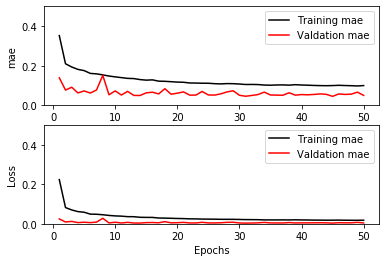

In [16]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

N = 1000
NOISE = 30
#損失関数とmaeの推移
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

plt.subplot(2,1,1)
plt.plot(epochs, mae,  color="black", label = 'Training mae')
plt.plot(epochs, val_mae,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('mae')
plt.ylim(0.0, 0.5)      # y軸の表示範囲
plt.subplot(2,1,2)
plt.plot(epochs, loss,  color="black", label = 'Training mae')
plt.plot(epochs, val_loss,  color="red", label = 'Valdation mae')
plt.legend()             # 凡例
plt.xlabel('Epochs')          # 軸ラベル
plt.ylabel('Loss')
plt.ylim(0.0, 0.5)
plt.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
plt.close()

In [17]:
abs_error = abs(np.array(model.predict(test_x).flatten()- t_test))
ave_abs = np.average(abs_error)
std_abs = np.std(abs_error)
error = "平均絶対誤差: %f ± %f" % (ave_abs, std_abs)
print(error)

平均絶対誤差: 0.049546 ± 0.041916


In [18]:
#historyの保存
import pandas as pd

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.json'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

hist_df = pd.DataFrame(history.history) 

with open(save_file, mode='w') as f:
    hist_df.to_json(f)

現在時刻： 2020-11-09 14:44:14.143953
保存ファイル名： 2020-11-09_14-44.json
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig10%/2020-11-09_14-44.json
